In [ ]:
## Notebook env: mirtud_env (R kernel)

In [8]:
suppressMessages(suppressWarnings(library(Biostrings)))
suppressMessages(suppressWarnings(library(ggplot2)))
suppressMessages(suppressWarnings(library(ggpubr)))
suppressMessages(suppressWarnings(library(tidyverse)))

## Prepare data to submit to tDRnamer ##

In [46]:
tRF_TuD = readDNAStringSet("/home/ssobti/projects/mir_tud/uploaded_data/tRF_groups/tRF_TuD.fa")
edited_names_for_tDRnamer = stringr::str_replace_all(names(tRF_TuD), "\\(", "_")
edited_names_for_tDRnamer = stringr::str_replace_all(edited_names_for_tDRnamer, "\\)", "_")
edited_names_for_tDRnamer = stringr::str_replace_all(edited_names_for_tDRnamer, "\\.", "_")
tRF_TuD_edited = tRF_TuD
names(tRF_TuD_edited) = edited_names_for_tDRnamer

In [ ]:
writeXStringSet(tRF_TuD_edited, '/home/ssobti/projects/mir_tud/uploaded_data/tRF_groups/tRF_TuD_edited_names_for_tDRnamer.fa')

## Analyze tDRnamer output ##

In [2]:
tDRnamer_tDR_sequences_output = readDNAStringSet("/home/ssobti/projects/mir_tud/uploaded_data/tRF_groups/tDRnamer_tDR_sequences_output.fa")

Warning message in .Call2("fasta_index", filexp_list, nrec, skip, seek.first.rec, :
“reading FASTA file /home/ssobti/projects/mir_tud/uploaded_data/tRF_groups/tDRnamer_tDR_sequences_output.fa: ignored 2909 invalid one-letter sequence codes”


### Build a key of groupings of tRFs based on unique sets of Sprinzl alignment positions to respective tRNAs ###

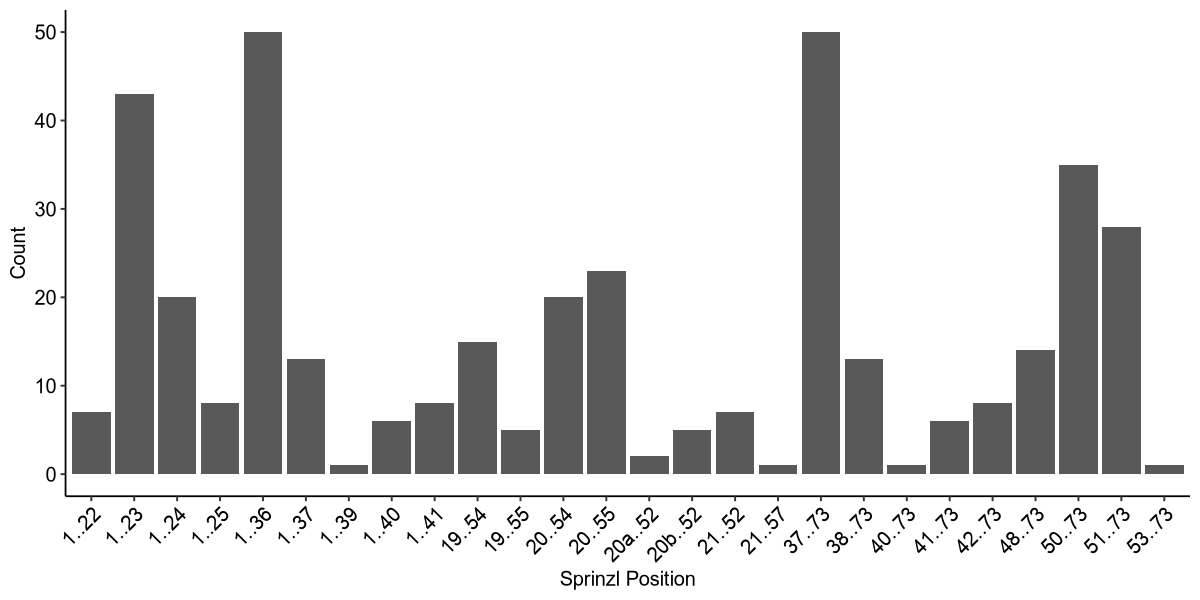

In [18]:
sprinzl_positions = sapply(stringr::str_split(names(tDRnamer_tDR_sequences_output), ' '), '[[', 3)
sprinzl_positions_counts = as.data.frame(table(sprinzl_positions))
sprinzl_positions_counts$sprinzl_positions = factor(sprinzl_positions_counts$sprinzl_positions, levels = sprinzl_positions_counts$sprinzl_positions)

saveRDS(sprinzl_positions_counts, '/home/ssobti/projects/mir_tud/fig_output/data/fig1/sprinzl_positions_counts.rds')
options(repr.plot.width=10, repr.plot.height=5)
sprinzl_positions_counts %>% 
    ggplot(aes(x = sprinzl_positions, y = Freq)) + geom_bar(stat = "identity") + theme_pubr() + 
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) + xlab('Sprinzl Position') + ylab('Count')

In [ ]:
sets_of_tRFs = unique(sprinzl_positions)
sets_of_tRFs ## 26 total sets

[1] "51..73"  "38..73"  "1..37"   "20..55"  "1..24"   "50..73"  "37..73" 
 [8] "1..23"   "1..36"   "19..54"  "20..54"  "1..22"   "19..55"  "48..73" 
[15] "41..73"  "20b..52" "1..40"   "42..73"  "1..25"   "1..41"   "21..52" 
[22] "53..73"  "40..73"  "1..39"   "21..57"  "20a..52"

In [ ]:
five_end_position_sets = sets_of_tRFs[sapply(stringr::str_split(sets_of_tRFs, '\\.\\.'), '[[', 1) == 1] 
five_end_position_sets ## 9 sets
five_end_groups = c(3, 1, 1, 3, 1, 3, 1, 3, 3)

[1] "1..37" "1..24" "1..23" "1..36" "1..22" "1..40" "1..25" "1..41" "1..39"

In [ ]:
three_end_position_sets = sets_of_tRFs[sapply(stringr::str_split(sets_of_tRFs, '\\.\\.'), '[[', 2) == 73] 
three_end_position_sets ## 9 sets
three_end_groups = c(2, 4, 2, 4, 2, 4, 4, 2, 4)

[1] "51..73" "38..73" "50..73" "37..73" "48..73" "41..73" "42..73" "53..73"
[9] "40..73"

In [ ]:
internal_position_sets = sets_of_tRFs[-sort(c(which(sapply(stringr::str_split(sets_of_tRFs, '\\.\\.'), '[[', 1) == 1), which(sapply(stringr::str_split(sets_of_tRFs, '\\.\\.'), '[[', 2) == 73)))] 
internal_position_sets ## 8 sets
internal_groups = c(6, 6, 6, 6, 6, 6, 6, 6)

[1] "20..55"  "19..54"  "20..54"  "19..55"  "20b..52" "21..52"  "21..57" 
[8] "20a..52"

In [39]:
key = data.frame(position = c(five_end_position_sets, internal_position_sets, three_end_position_sets), group = c(five_end_groups, internal_groups, three_end_groups))
head(key)

,position,group
,<chr>,<dbl>
1,1..37,3
2,1..24,1
3,1..23,1
4,1..36,3
5,1..22,1
6,1..40,3


### Assign groups to individual tRFs based on key ###

In [58]:
tDRnamer_tDR_info_output = read.csv('/home/ssobti/projects/mir_tud/uploaded_data/tRF_groups/tDRnamer_tDR_info_output.txt', sep = '\t', header = TRUE)
tDRnamer_tDR_info_output$group = plyr::mapvalues(tDRnamer_tDR_info_output$position, from = key$position, to = key$group)
tDRnamer_tDR_info_output$name = plyr::mapvalues(tDRnamer_tDR_info_output$seq_name, from = names(tRF_TuD_edited), to = names(tRF_TuD))
table(tDRnamer_tDR_info_output$group)  ## evenly divided in # of tRFs in each group --> all 5 groups have 78 tRFs
head(tDRnamer_tDR_info_output)


 1  2  3  4  6 
78 78 78 78 78 

,seq_name,source_type,tDR_name,synonyms,source_tRNAs,length,position,anticodon,isotype,mismatches,indels,mismatch_locations,tRNA_domains,group_ID,other_tDRs_in_group,sequence,group,name
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,tRNA-Ala-AGC-1-1_3t,mature tRNA,tDR-51:73-Ala-AGC-1,None,tRNA-Ala-AGC-1,23,51..73,AGC,Ala,0,0,None,TSLE_Z,28,3,GGGUUCGAUCCCCAGUACCUCCA,2,tRNA-Ala-AGC-1-1.3t
2,tRNA-Ala-AGC-1-1_rh,mature tRNA,tDR-38:73-Ala-AGC-1,None,tRNA-Ala-AGC-1,36,38..73,AGC,Ala,0,0,None,CE_V_TSLE_Z,28,3,UGCACGAGGUCCUGGGUUCGAUCCCCAGUACCUCCA,4,tRNA-Ala-AGC-1-1.rh
3,tRNA-Ala-AGC-1-1_lh,mature tRNA,tDR-1:37-Ala-AGC-1,None,tRNA-Ala-AGC-1,36,1..37,AGC,Ala,0,0,None,A_DSLE_CSL,28,3,GGGGGUAUAGCUCAGUGGUAGAGCGCGUGCUUAGCA,3,tRNA-Ala-AGC-1-1.lh
4,tRNA-Ala-AGC-1-1_2t,mature tRNA,tDR-20:55-Ala-AGC-1-M2,tDR-20:55-Ala-AGC-6-M2,"tRNA-Ala-AGC-1,tRNA-Ala-AGC-6",36,20..55,AGC,Ala,0,0,None,DLE_CSLE_V_TSL,28,3,UAGAGCGCGUGCUUAGCAUGCACGAGGUCCUGGGUU,6,tRNA-Ala-AGC-1-1.2t
5,tRNA-Ala-AGC-1-1_1t,mature tRNA,tDR-1:24-Ala-AGC-1-M3,"tDR-1:24-Cys-GCA-2-M3,tDR-1:24-Cys-GCA-4-M3","tRNA-Ala-AGC-1,tRNA-Cys-GCA-2,tRNA-Cys-GCA-4",23,1..24,"GCA,AGC","Cys,Ala",0,0,None,A_DSLE,2,8,GGGGGUAUAGCUCAGUGGUAGAG,1,tRNA-Ala-AGC-1-1.1t
6,tRNA-Cys-GCA-4-1_1t,mature tRNA,tDR-1:24-Ala-AGC-1-M3,"tDR-1:24-Cys-GCA-2-M3,tDR-1:24-Cys-GCA-4-M3","tRNA-Ala-AGC-1,tRNA-Cys-GCA-2,tRNA-Cys-GCA-4",23,1..24,"GCA,AGC","Cys,Ala",0,0,None,A_DSLE,2,8,GGGGGUAUAGCUCAGUGGUAGAG,1,tRNA-Cys-GCA-4-1.1t


In [69]:
tRF_groups = tDRnamer_tDR_info_output[, c('name', 'tDR_name', 'group', 'length', 'position', 'sequence')]
colnames(tRF_groups) = c('tRF', 'tDRnamer_name', 'group', 'length', 'Sprinzl_alignment_position', 'sequence')
write.csv(tRF_groups, '/home/ssobti/projects/mir_tud/output_data/tRF_groups.csv', row.names = FALSE)
head(tRF_groups)

,tRF,tDRnamer_name,group,length,Sprinzl_alignment_position,sequence
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,tRNA-Ala-AGC-1-1.3t,tDR-51:73-Ala-AGC-1,2,23,51..73,GGGUUCGAUCCCCAGUACCUCCA
2,tRNA-Ala-AGC-1-1.rh,tDR-38:73-Ala-AGC-1,4,36,38..73,UGCACGAGGUCCUGGGUUCGAUCCCCAGUACCUCCA
3,tRNA-Ala-AGC-1-1.lh,tDR-1:37-Ala-AGC-1,3,36,1..37,GGGGGUAUAGCUCAGUGGUAGAGCGCGUGCUUAGCA
4,tRNA-Ala-AGC-1-1.2t,tDR-20:55-Ala-AGC-1-M2,6,36,20..55,UAGAGCGCGUGCUUAGCAUGCACGAGGUCCUGGGUU
5,tRNA-Ala-AGC-1-1.1t,tDR-1:24-Ala-AGC-1-M3,1,23,1..24,GGGGGUAUAGCUCAGUGGUAGAG
6,tRNA-Cys-GCA-4-1.1t,tDR-1:24-Ala-AGC-1-M3,1,23,1..24,GGGGGUAUAGCUCAGUGGUAGAG
